In [2]:
import pandas as pd
import matplotlib as pl
import seaborn as sns


In [3]:
data = pd.read_csv('E0.csv')
data.head()
# data.describe()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88


In [4]:
# Select relevant columns for the data story
columns_to_keep = [
    'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 
    'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
]

# Create a new dataframe with only the selected columns
cleaned_data = data[columns_to_keep]

# Display the cleaned data
cleaned_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,11/08/2023,Burnley,Man City,0,3,A,6,17,1,8,11,8,6,5,0,0,1,0
1,12/08/2023,Arsenal,Nott'm Forest,2,1,H,15,6,7,2,12,12,8,3,2,2,0,0
2,12/08/2023,Bournemouth,West Ham,1,1,D,14,16,5,3,9,14,10,4,1,4,0,0
3,12/08/2023,Brighton,Luton,4,1,H,27,9,12,3,11,12,6,7,2,2,0,0
4,12/08/2023,Everton,Fulham,0,1,A,19,9,9,2,12,6,10,4,0,2,0,0


In [5]:
cleaned_data.describe()

,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.800000,1.478947,15.402632,12.181579,5.436842,4.431579,10.744737,11.347368,6.123684,4.713158,1.910526,2.263158,0.068421,0.081579
std,1.365616,1.277811,6.261959,5.467696,2.885449,2.526493,3.457331,3.674826,3.221460,2.906518,1.392553,1.389448,0.263030,0.283546
min,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,11.000000,8.000000,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,15.000000,11.000000,5.000000,4.000000,11.000000,11.000000,6.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,3.000000,2.000000,19.000000,15.000000,7.000000,6.000000,13.000000,14.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,6.000000,8.000000,36.000000,30.000000,15.000000,15.000000,20.000000,22.000000,17.000000,15.000000,6.000000,7.000000,2.000000,2.000000


### world development indicators datasets from the world bank


In [28]:
df = pd.read_csv('/Users/ay/Desktop/IE 6600/project1/WDI_CSV_2024_09_25/WDIcountry-series.csv')

df1 = pd.read_csv('/Users/ay/Desktop/IE 6600/project1/WDI_CSV_2024_09_25/WDICSV.csv')
gha = df1[df1['Country Code'] == 'GHA']
gha.to_csv('/Users/ay/Desktop/IE 6600/project1/WDI_CSV_2024_09_25/GHA_data.csv', index=False)


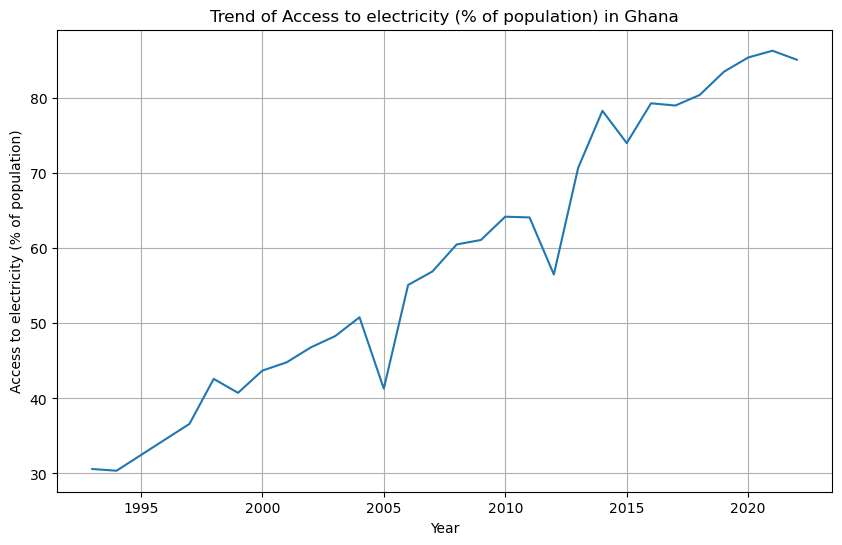

In [27]:
import matplotlib.pyplot as plt

# Set the index to the years for easier plotting
gha.set_index('Indicator Name', inplace=True)

# Plot a specific indicator over the years
indicator = 'Access to electricity (% of population)'
gha.loc[indicator].drop(['Country Name', 'Country Code', 'Indicator Code']).T.plot(figsize=(10, 6))
plt.title(f'Trend of {indicator} in Ghana')
plt.xlabel('Year')
plt.ylabel(indicator)
plt.grid(True)
plt.show()